In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing other necessary libraries 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# data link
# https://www.kaggle.com/akram24/position-salaries?select=Position_Salaries.csv

df = pd.read_csv("Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [9]:
# checking for null value 
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

<AxesSubplot:>

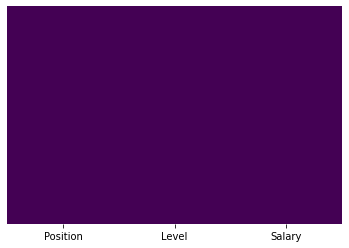

In [10]:
# there is many more way of checking null vaules one of them is 
# If there will not be any vertical line in graph means no null null value
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

above graph we can see that there is not any line in graph i.e. no null value

In [11]:
# Splitting the data into dependen and independent variable
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [12]:
# Here not much data to split so we will train our model without splitting
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [13]:
# prediction 
y_pred = model.predict(X)
y_pred[:5]

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061])

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(X, y)

print("RMSE value : ", rmse)
print("R2 value : ", r2)

RMSE value :  163388.73519272613
R2 value :  -17322232852.151516


Text(0, 0.5, 'Salary')

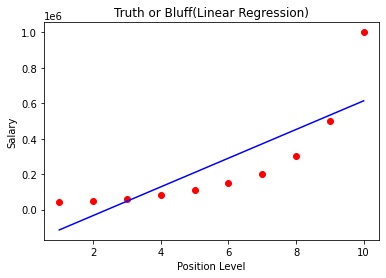

In [15]:
# Visualising the Linear Regression
plt.scatter(X,y, color = "red")
plt.plot(X, model.predict(X), color= "blue")
plt.title("Truth or Bluff(Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

### fitting Polynomial Rgression to the training set 

In [16]:
# fitting Polynomial Rgression to the training set 

from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(degree=2)
X_poly = poly_model.fit_transform(X)

In [17]:
# for polynomial regression we need to  fit with linear regression once again
lin_model = LinearRegression()
lin_model.fit(X_poly, y)

LinearRegression()

In [18]:
y_poly_pred1 = lin_model.predict(X_poly)
y_poly_pred1

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_poly_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_poly_pred1)

print("RMSE value : ", rmse)
print("R2 value : ", r2)

RMSE value :  82212.12400451247
R2 value :  0.9162082221443942


Text(0, 0.5, 'Salary')

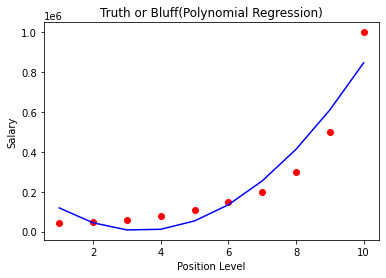

In [20]:
# Visualising the Polynomial Regression (degree = 2)
plt.scatter(X,y, color = "red")
plt.plot(X, lin_model.predict(poly_model.fit_transform(X)), color= "blue")
plt.title("Truth or Bluff(Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

### Increasing the degree to check optimal values

In [21]:
# fitting Polynomial Rgression to the training set 

from sklearn.preprocessing import PolynomialFeatures

poly_model2 = PolynomialFeatures(degree=3)
X_poly2 = poly_model2.fit_transform(X)

# for polynomial regression we need to  fit with linear regression once again
lin_model2 = LinearRegression()
lin_model2.fit(X_poly2, y)


y_poly_pred2 = lin_model2.predict(X_poly2)
y_poly_pred2


from sklearn.metrics import mean_squared_error, r2_score
mse2 = mean_squared_error(y, y_poly_pred2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y, y_poly_pred2)

print("RMSE value : ", rmse2)
print("R2 value : ", r22)

RMSE value :  38931.50401232908
R2 value :  0.9812097727913368


Text(0, 0.5, 'Salary')

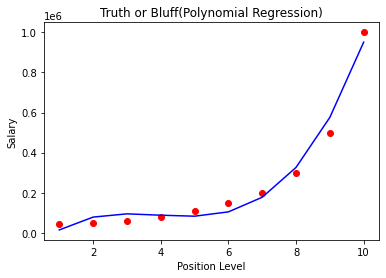

In [22]:
# Visualising the Polynomial Regression (degree = 3)
plt.scatter(X,y, color = "red")
plt.plot(X, y_poly_pred2, color= "blue")
plt.title("Truth or Bluff(Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

# y_poly_pred2 is same as lin_model2.predict(poly_model2.fit_transform(X))

In [23]:
# increasing the degree further 

# fitting Polynomial Rgression to the training set 

from sklearn.preprocessing import PolynomialFeatures

poly_model3 = PolynomialFeatures(degree=4)
X_poly3 = poly_model3.fit_transform(X)

# for polynomial regression we need to  fit with linear regression once again
lin_model3 = LinearRegression()
lin_model3.fit(X_poly3, y)


y_poly_pred3 = lin_model3.predict(X_poly3)
y_poly_pred3


from sklearn.metrics import mean_squared_error, r2_score
mse3 = mean_squared_error(y, y_poly_pred3)
rmse3 = np.sqrt(mse3)
r23 = r2_score(y, y_poly_pred3)

print("Predicted value : ",y_poly_pred3[:2] )
print("RMSE value : ", rmse3)
print("R2 value : ", r23)

Predicted value :  [53356.64335675 31759.90675984]
RMSE value :  14503.23490962699
R2 value :  0.9973922891706614


Text(0, 0.5, 'Salary')

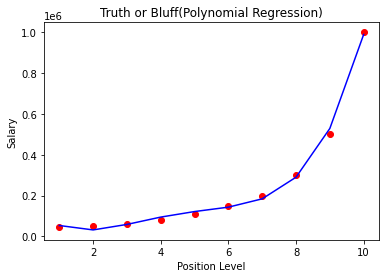

In [24]:
# Visualising the Polynomial Regression (degree = 4)
plt.scatter(X,y, color = "red")
plt.plot(X, y_poly_pred3, color= "blue")
plt.title("Truth or Bluff(Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

# y_poly_pred3 is same as lin_model3.predict(poly_model3.fit_transform(X))

### Visualising the Polynomial Regression results (for higher resolution and smoother curve)

In [25]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [26]:
# reshape the grid 
X_grid = X_grid.reshape((len(X_grid), 1))
X_grid[:5]

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4]])

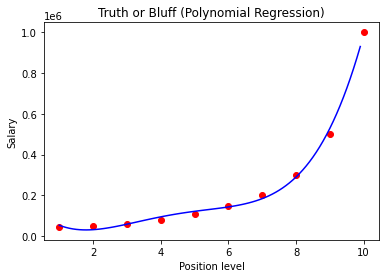

In [27]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_model3.predict(poly_model3.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### above curve is much smoother than normal polynomial curve

In [28]:
# Increaseing  degree 

# fitting Polynomial Rgression to the training set 

from sklearn.preprocessing import PolynomialFeatures

poly_model4 = PolynomialFeatures(degree=5)
X_poly4 = poly_model4.fit_transform(X)

# for polynomial regression we need to  fit with linear regression once again
lin_model4 = LinearRegression()
lin_model4.fit(X_poly4, y)


y_poly_pred4 = lin_model4.predict(X_poly4)
y_poly_pred4


from sklearn.metrics import mean_squared_error, r2_score
mse4 = mean_squared_error(y, y_poly_pred4)
rmse4 = np.sqrt(mse4)
r24 = r2_score(y, y_poly_pred4)

print("Predicted value : ",y_poly_pred4[:2] )
print("RMSE value : ", rmse4)
print("R2 value : ", r24)

Predicted value :  [43895.104896   53836.82983717]
RMSE value :  4047.5034752660945
R2 value :  0.9997969027099753


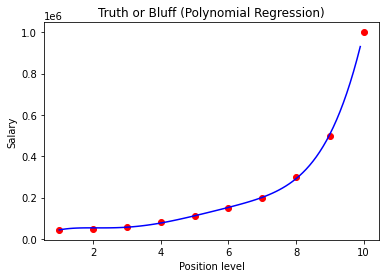

In [29]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_model4.predict(poly_model4.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [30]:
# Increaseing  degree 

# fitting Polynomial Rgression to the training set 

from sklearn.preprocessing import PolynomialFeatures

poly_model5 = PolynomialFeatures(degree=6)
X_poly5 = poly_model5.fit_transform(X)

# for polynomial regression we need to  fit with linear regression once again
lin_model5 = LinearRegression()
lin_model5.fit(X_poly5, y)


y_poly_pred5 = lin_model5.predict(X_poly5)
y_poly_pred5


from sklearn.metrics import mean_squared_error, r2_score
mse5 = mean_squared_error(y, y_poly_pred5)
rmse5 = np.sqrt(mse5)
r25 = r2_score(y, y_poly_pred5)

print("Predicted value : ",y_poly_pred5[:2] )
print("RMSE value : ", rmse5)
print("R2 value : ", r25)

Predicted value :  [45190.55944199 49086.82983877]
RMSE value :  2018.7783931047315
R2 value :  0.9999494749253776


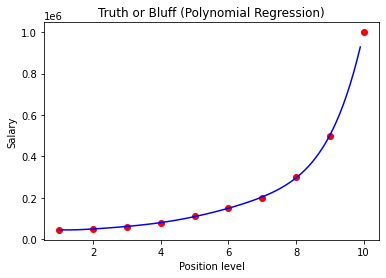

In [31]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_model5.predict(poly_model5.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [32]:
# Increaseing  degree 

# fitting Polynomial Rgression to the training set 

from sklearn.preprocessing import PolynomialFeatures

poly_model6 = PolynomialFeatures(degree=6)
X_poly6 = poly_model6.fit_transform(X)

# for polynomial regression we need to  fit with linear regression once again
lin_model6 = LinearRegression()
lin_model6.fit(X_poly6, y)


y_poly_pred6 = lin_model6.predict(X_poly6)
y_poly_pred6


from sklearn.metrics import mean_squared_error, r2_score
mse6 = mean_squared_error(y, y_poly_pred6)
rmse6 = np.sqrt(mse6)
r26 = r2_score(y, y_poly_pred6)

print("Predicted value : ",y_poly_pred6[:2] )
print("RMSE value : ", rmse6)
print("R2 value : ", r26)

Predicted value :  [45190.55944199 49086.82983877]
RMSE value :  2018.7783931047315
R2 value :  0.9999494749253776


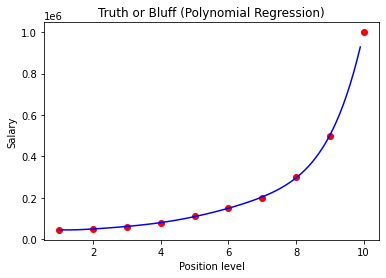

In [33]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_model6.predict(poly_model6.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()